In [ ]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


# Movies Dataset

In [90]:
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("bharatnatrayn/movies-dataset-for-feature-extracion-prediction")

print("Path to dataset:", path)

Using Colab cache for faster access to the 'movies-dataset-for-feature-extracion-prediction' dataset.
Path to dataset: /kaggle/input/movies-dataset-for-feature-extracion-prediction


In [6]:
import pandas as pd

In [7]:
df = pd.read_csv(f"{path}/movies.csv")

### Initial Inspection

In [8]:
df.shape

(9999, 9)

In [9]:
df.columns

Index(['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES',
       'RunTime', 'Gross'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [11]:
df.describe()

,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


In [12]:
df.head(3)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN


## Improper Formatting Issues
Clear \n

In [13]:
df['GENRE'][0]

'\nAction, Horror, Thriller            '

In [14]:
df['STARS'][0]

'\n    Director:\nPeter Thorwarth\n| \n    Stars:\nPeri Baumeister, \nCarl Anton Koch, \nAlexander Scheer, \nKais Setti\n'

In [15]:
df['ONE-LINE'][0]

'\nA woman with a mysterious illness is forced into action when a group of terrorists attempt to hijack a transatlantic overnight flight.'

### Cleaning

In [16]:
df_formatting = df.copy()
cols = ['GENRE','STARS','ONE-LINE']
for col in cols:
    df_formatting[col] = df_formatting[col].str.replace('\n','').str.strip()

In [17]:
df_formatting['GENRE'][0]

'Action, Horror, Thriller'

In [18]:
df_formatting['STARS'][0]

'Director:Peter Thorwarth|     Stars:Peri Baumeister, Carl Anton Koch, Alexander Scheer, Kais Setti'

In [19]:
df_formatting['ONE-LINE'][0]

'A woman with a mysterious illness is forced into action when a group of terrorists attempt to hijack a transatlantic overnight flight.'

## Inconsistent Formatting
Break into Columns

In [20]:
df['YEAR'][0:3]

,YEAR
0,(2021)
1,(2021– )
2,(2010–2022)


Removing '(' & ')'

In [21]:
df_year = df_formatting.copy()
df_year['YEAR'] = df_year['YEAR'].str.replace('(', '').str.replace(')', '').str.strip()
df_year['YEAR'][0:3]

,YEAR
0,2021
1,2021–
2,2010–2022


Is movie/series

In [22]:
df_year[['Start_Year', 'End_Year']] = (df_year['YEAR'].str.split('–', expand=True))


In [23]:
df_year['Start_Year'] = pd.to_numeric(df_year['Start_Year'], errors='coerce')
df_year['End_Year'] = pd.to_numeric(df_year['End_Year'], errors='coerce')

Movie/Series

In [24]:
df_year['Is_Series'] = df_year['YEAR'].str.contains('–', na=False)

df_year['Is_Ongoing'] = (df_year['Is_Series'] & df_year['End_Year'].isna())

In [25]:
df_year.drop(columns=['YEAR'], inplace=True)
df_year.head(3)


,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Start_Year,End_Year,Is_Series,Is_Ongoing
0,Blood Red Sky,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri Baume...,"21,062",121.0,NaN,2021.0,NaN,False,False
1,Masters of the Universe: Revelation,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...","17,870",25.0,NaN,2021.0,NaN,True,True
2,The Walking Dead,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...","885,805",44.0,NaN,2010.0,2022.0,True,False


### Missing Values in Year
(NOt DONE YET)

- start date nan -> avg of same end date's start date by movie/series

In [26]:
print(df_year['Start_Year'].isnull().sum())
print(df_year['End_Year'].isnull().sum())

1692
8611


In [27]:
df_year['Is_Series'].value_counts()

,count
Is_Series,
False,5431
True,4568


## Non-atomic / Multi-valued Attributes

In [28]:
df_year['GENRE'][0:3]

,GENRE
0,"Action, Horror, Thriller"
1,"Animation, Action, Adventure"
2,"Drama, Horror, Thriller"


In [29]:
df_genre = df_year.copy()
df_genre['GENRE'] = df_genre['GENRE'].str.strip()
df_genre['GENRE'] = df_genre['GENRE'].str.split(', ')

In [30]:
df_genre['Genre_Count'] = df_genre['GENRE'].apply(
    lambda x: len(x) if isinstance(x, list) else 0
)

df_genre['Genre_Count'].value_counts()

,count
Genre_Count,
3,5141
1,2582
2,2196
0,80


## Missing Values

In [31]:
df_genre.isnull().sum()

,0
MOVIES,0
GENRE,80
RATING,1820
ONE-LINE,0
STARS,0
VOTES,1820
RunTime,2958
Gross,9539
Start_Year,1692
End_Year,8611


- Gross: Drop
- Unvoted: Drop -> Vote/Rating

In [32]:
df_test = df_genre.copy()
df_test = df_test.dropna(subset=['VOTES'])
df_test.isnull().sum()

,0
MOVIES,0
GENRE,11
RATING,0
ONE-LINE,0
STARS,0
VOTES,0
RunTime,1393
Gross,7719
Start_Year,876
End_Year,6829


In [33]:
df_test = df_test.drop(columns=['Gross'])
df_test.isnull().sum()

,0
MOVIES,0
GENRE,11
RATING,0
ONE-LINE,0
STARS,0
VOTES,0
RunTime,1393
Start_Year,876
End_Year,6829
Is_Series,0


### Missing Value for Runtime

In [34]:
df_test.groupby('Is_Series')['RunTime'].mean()

,RunTime
Is_Series,
False,90.492119
True,39.310864


In [35]:
df_test.loc[(df_test['Is_Series'] == False) & (df_test['RunTime'].isna()), 'RunTime'] = 90.492119
df_test.loc[(df_test['Is_Series'] == True) & (df_test['RunTime'].isna()), 'RunTime'] = 39.310864

In [36]:
df_test.groupby('Is_Series')['RunTime'].mean()

,RunTime
Is_Series,
False,90.492119
True,39.310864


In [37]:
df_test.shape

(8179, 12)

## Feature Extraction

### Drop less useful

In [38]:
df_feature = df_test.copy()

In [39]:
df_feature.head(3)

,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Start_Year,End_Year,Is_Series,Is_Ongoing,Genre_Count
0,Blood Red Sky,"[Action, Horror, Thriller]",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri Baume...,"21,062",121.0,2021.0,NaN,False,False,3
1,Masters of the Universe: Revelation,"[Animation, Action, Adventure]",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...","17,870",25.0,2021.0,NaN,True,True,3
2,The Walking Dead,"[Drama, Horror, Thriller]",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...","885,805",44.0,2010.0,2022.0,True,False,3


In [40]:
df_feature = df_feature.drop(columns=['ONE-LINE', 'STARS'])

In [41]:
df_feature.head()

,MOVIES,GENRE,RATING,VOTES,RunTime,Start_Year,End_Year,Is_Series,Is_Ongoing,Genre_Count
0,Blood Red Sky,"[Action, Horror, Thriller]",6.1,"21,062",121.0,2021.0,NaN,False,False,3
1,Masters of the Universe: Revelation,"[Animation, Action, Adventure]",5.0,"17,870",25.0,2021.0,NaN,True,True,3
2,The Walking Dead,"[Drama, Horror, Thriller]",8.2,"885,805",44.0,2010.0,2022.0,True,False,3
3,Rick and Morty,"[Animation, Adventure, Comedy]",9.2,"414,849",23.0,2013.0,NaN,True,True,3
5,Outer Banks,"[Action, Crime, Drama]",7.6,"25,858",50.0,2020.0,NaN,True,True,3


In [47]:
df_feature['Is_Series'].value_counts()

,count
Is_Series,
False,4374
True,3805


Checking how many "movies" have end date

In [53]:
df_feature[(df_feature["Is_Series"] == False) & (df_feature["End_Year"].notna())].head()

,MOVIES,GENRE,RATING,VOTES,RunTime,Start_Year,End_Year,Is_Series,Is_Ongoing,Genre_Count


None.

In [65]:
df_feature.loc[df_feature["Is_Series"].eq(False), "End_Year"] = df_feature["Start_Year"]
df_feature.loc[df_feature["Is_Series"] & df_feature["Is_Ongoing"], "End_Year"] = df_feature["Start_Year"]

In [66]:
df_feature.isna().sum()

,0
MOVIES,0
GENRE,11
RATING,0
VOTES,0
RunTime,0
Start_Year,876
End_Year,872
Is_Series,0
Is_Ongoing,0
Genre_Count,0


In [70]:
df_feature.loc[df_feature["Start_Year"].isna() & df_feature["End_Year"].isna(),"Is_Series"].value_counts()

,count
Is_Series,
False,856
True,16


## Genre Analysis

In [94]:
df_exploded = df_feature.explode("GENRE").reset_index(drop=True)
df_exploded.head()

,MOVIES,GENRE,RATING,VOTES,RunTime,Start_Year,End_Year,Is_Series,Is_Ongoing,Genre_Count
0,Blood Red Sky,Action,6.1,"21,062",121.0,2021.0,2021.0,False,False,3
1,Blood Red Sky,Horror,6.1,"21,062",121.0,2021.0,2021.0,False,False,3
2,Blood Red Sky,Thriller,6.1,"21,062",121.0,2021.0,2021.0,False,False,3
3,Masters of the Universe: Revelation,Animation,5.0,"17,870",25.0,2021.0,2021.0,True,True,3
4,Masters of the Universe: Revelation,Action,5.0,"17,870",25.0,2021.0,2021.0,True,True,3


In [95]:
df_genre['Genre_Count'].value_counts()

,count
Genre_Count,
3,5141
1,2582
2,2196
0,80


In [97]:
df_exploded['GENRE'].value_counts()

,count
GENRE,
Drama,3507
Comedy,2419
Action,1844
Animation,1405
Crime,1377
Adventure,1337
Documentary,1137
Thriller,777
Romance,764


## Final Analysis

In [125]:
df_feature.shape

(8179, 10)

In [166]:
df_feature.isnull().sum()

,0
MOVIES,0
GENRE,11
RATING,0
VOTES,0
RunTime,0
Start_Year,876
End_Year,872
Is_Series,0
Is_Ongoing,0
Genre_Count,0


### Average Rating by Genre

(5.5, 7.5)

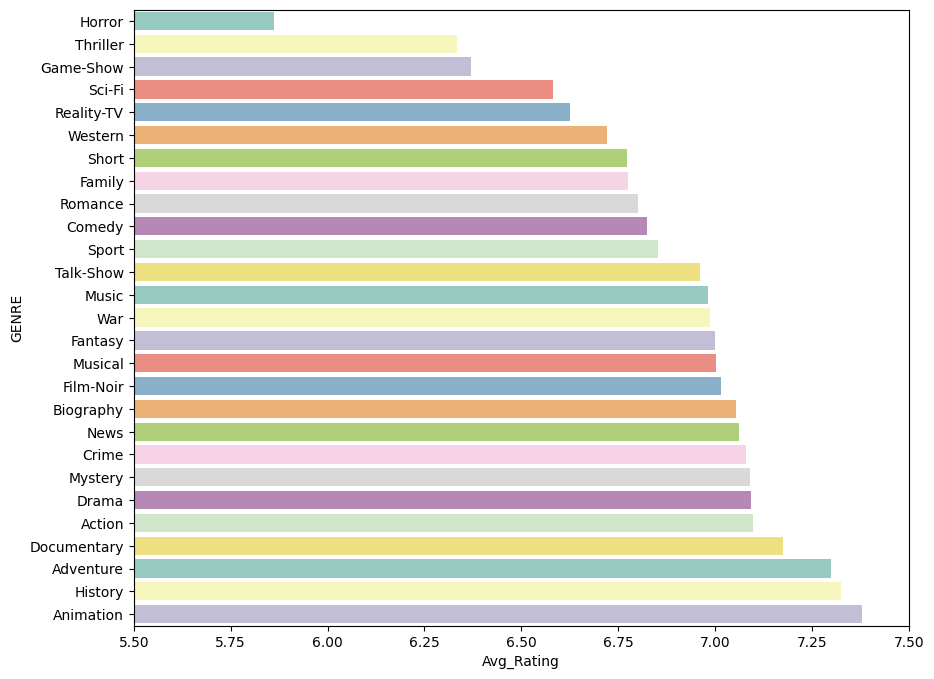

In [124]:
genre_avg = (
    df_exploded
        .groupby("GENRE", as_index=False)["RATING"]
        .mean()
        .rename(columns={"RATING": "Avg_Rating"})
        .sort_values("Avg_Rating")
)

plt.figure(figsize=(10, 8))

ax = sns.barplot(
    data=genre_avg,
    x="Avg_Rating",
    y="GENRE",
)

plt.xlim(5.5, 7.5)

### Popularity vs Votes
Shows no clear bias between highly-rated and high-voted

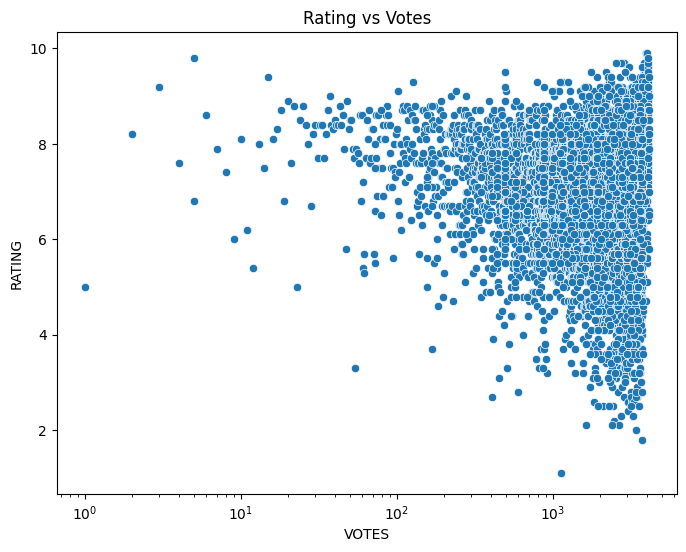

In [127]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_feature, x="VOTES", y="RATING")
plt.xscale("log")
plt.title("Rating vs Votes")
plt.show()

### Average Rating Over Time

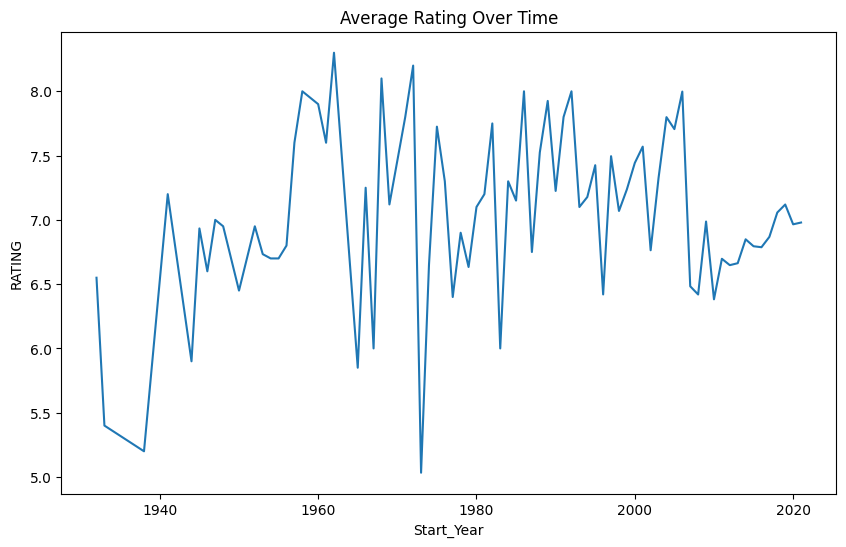

In [128]:
year_rating = (
    df_feature
        .groupby("Start_Year", as_index=False)["RATING"]
        .mean()
)

plt.figure(figsize=(10,6))
sns.lineplot(data=year_rating, x="Start_Year", y="RATING")
plt.title("Average Rating Over Time")
plt.show()


TO minimize fluctuations,

### Average Rating by Decade

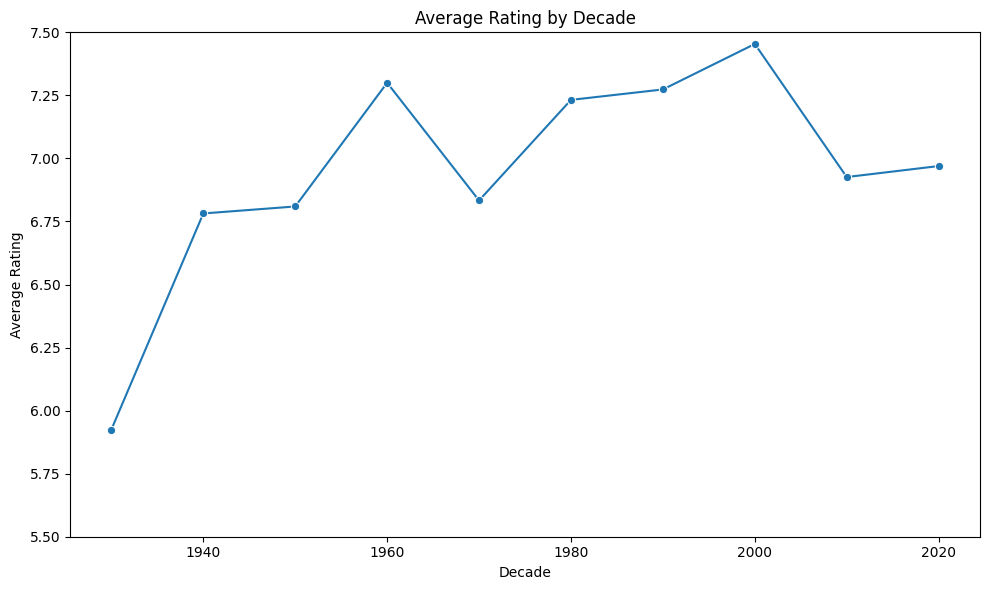

In [129]:
decade_avg = (
    df_feature
        .assign(Decade=(df_feature["Start_Year"] // 10) * 10)
        .groupby("Decade", as_index=False)["RATING"]
        .mean()
        .sort_values("Decade")
)

plt.figure(figsize=(10, 6))

sns.lineplot(data=decade_avg, x="Decade", y="RATING", marker="o")

plt.title("Average Rating by Decade")
plt.xlabel("Decade")
plt.ylabel("Average Rating")
plt.ylim(5.5, 7.5)   # adjust based on your data range
plt.tight_layout()
plt.show()


### Genre Count vs Rating
Multi-genre movies seem to perform better for this dataset

/tmp/ipython-input-930292681.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


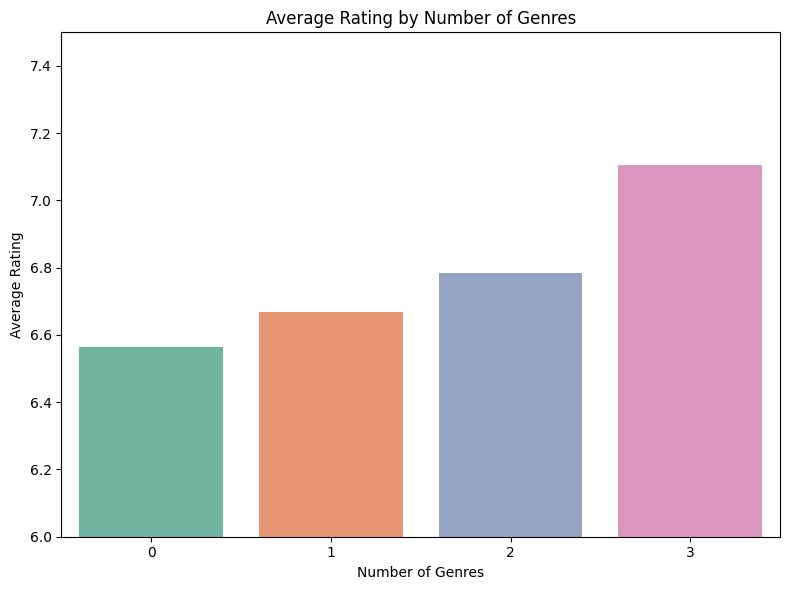

In [142]:
genrecount_avg = (
    df_feature
        .groupby("Genre_Count", as_index=False)["RATING"]
        .mean()
        .sort_values("Genre_Count")
)

plt.figure(figsize=(8, 6))

sns.barplot(
    data=genrecount_avg,
    x="Genre_Count",
    y="RATING",
    palette="Set2"
)

plt.title("Average Rating by Number of Genres")
plt.xlabel("Number of Genres")
plt.ylabel("Average Rating")
plt.ylim(6, 7.5)
plt.tight_layout()
plt.show()

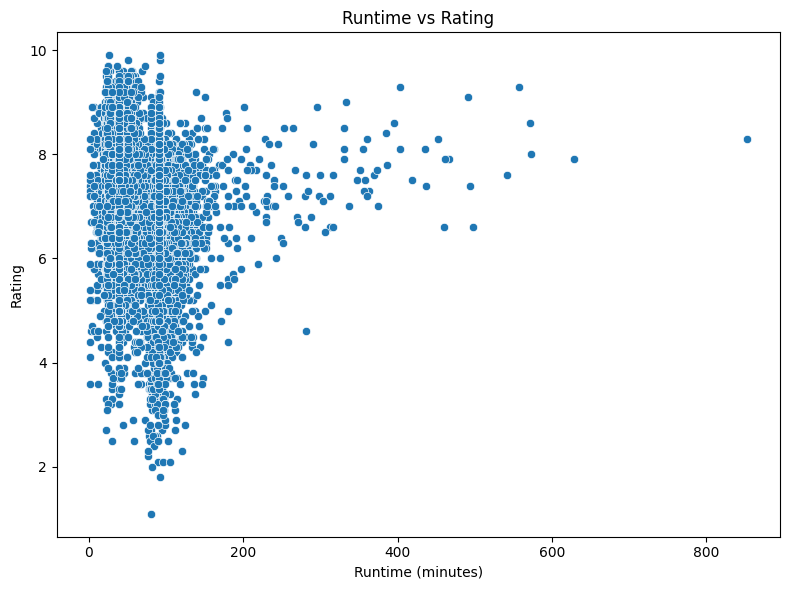

In [152]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df_feature,
    x="RunTime",
    y="RATING"
)

plt.title("Runtime vs Rating")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

Zoomed-in

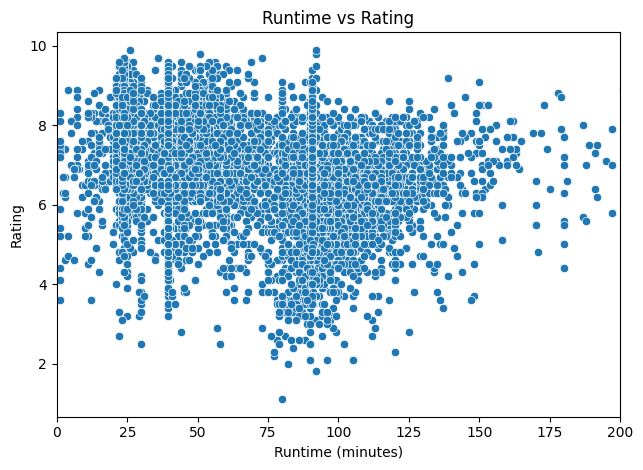

In [159]:
sns.scatterplot(
    data=df_feature,
    x="RunTime",
    y="RATING"
)

plt.title("Runtime vs Rating")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Rating")
plt.tight_layout()
plt.xlim(0,200)
plt.show()

Slope

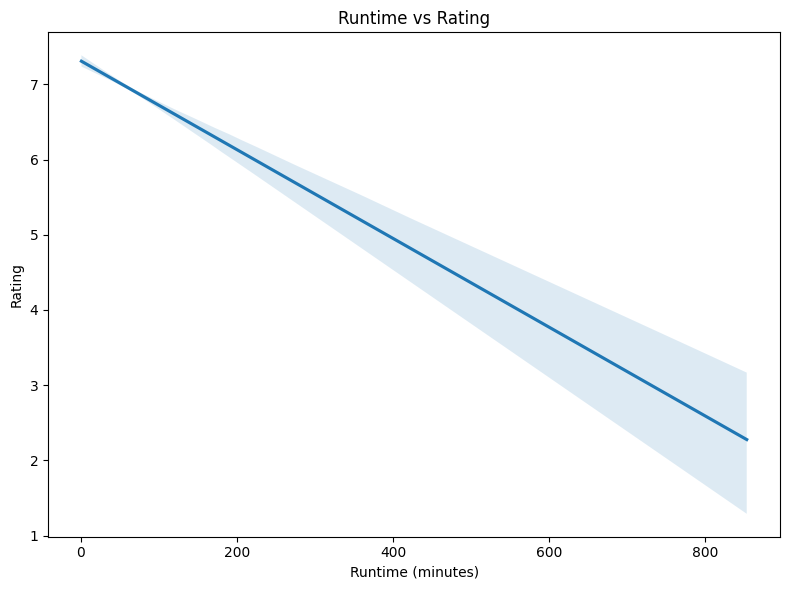

In [162]:
plt.figure(figsize=(8, 6))

sns.regplot(
    data=df_feature,
    x="RunTime",
    y="RATING",
    scatter=False
)

plt.title("Runtime vs Rating")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


### Movies made over Years

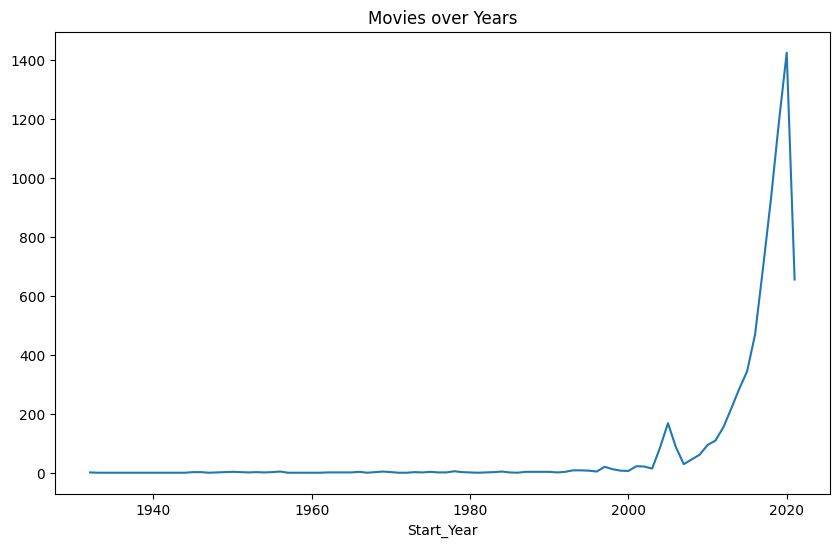

In [161]:
year_count = df_feature["Start_Year"].value_counts().sort_index()

plt.figure(figsize=(10,6))
year_count.plot()
plt.title("Movies over Years")
plt.show()
